#### Lesson: Linear Algebra

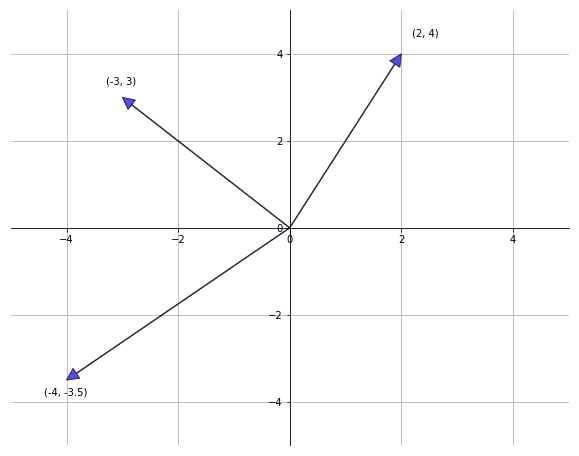

In [1]:
# Vectors

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

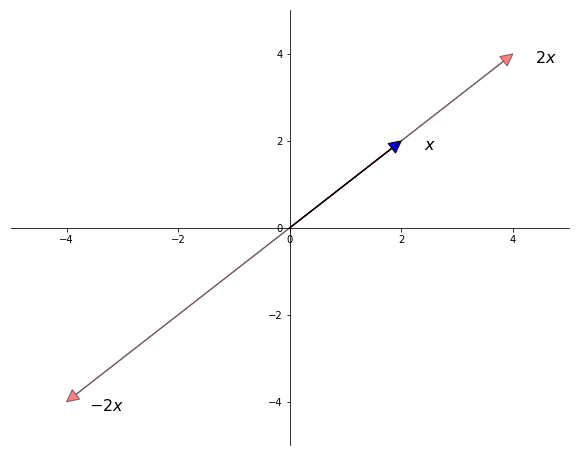

In [2]:
# Multiplication

import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')


scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

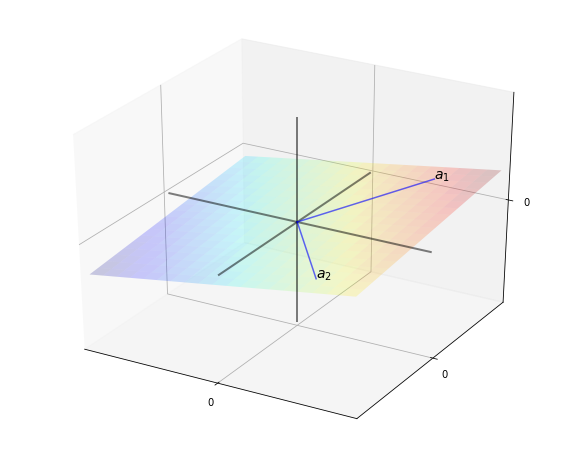

In [3]:
# Span

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 0.2, 0.1

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
plt.show()

![Ex1](img/linalg_1.png)

![Ex1](img/linalg_2.png)

![Ex1](img/linalg_3.png)

![Ex1](img/linalg_4.png)

#### Lesson: Orthogonal Projections and Their Applications

skipping

#### Lesson: LLN and CLT

skipping

#### Lesson: Linear State Space Models

![Pic1](img/lssm_1.png)

![Pic2](img/lssm_2.png)

Exercise 1: Replicate this graph.

![Ex1](img/lssm_3.png)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LinearStateSpace

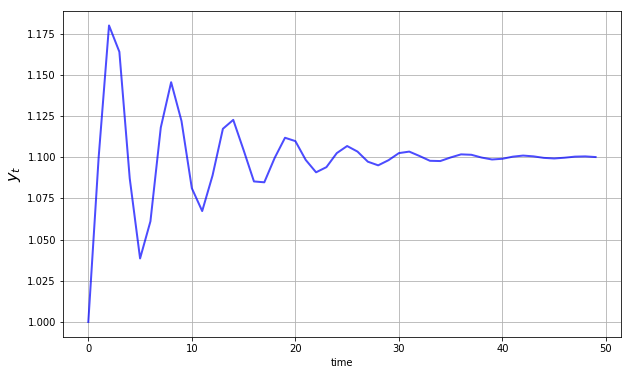

In [4]:
ϕ_0, ϕ_1, ϕ_2 = 1.1, 0.8, -0.8

A = [[1,     0,     0  ],
     [ϕ_0,   ϕ_1,   ϕ_2],
     [0,     1,     0  ]]
C = np.zeros((3, 1))
G = [0, 1, 0]

ar = LinearStateSpace(A, C, G, mu_0=np.ones(3))
x, y = ar.simulate(ts_length=50)

fig, ax = plt.subplots(figsize=(10, 6))
y = y.flatten()
ax.plot(y, 'b-', lw=2, alpha=0.7)
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('$y_t$', fontsize=16)
plt.show()

Ezercise 2: Repliate the graph

![Ex2](img/lssm_4.png)

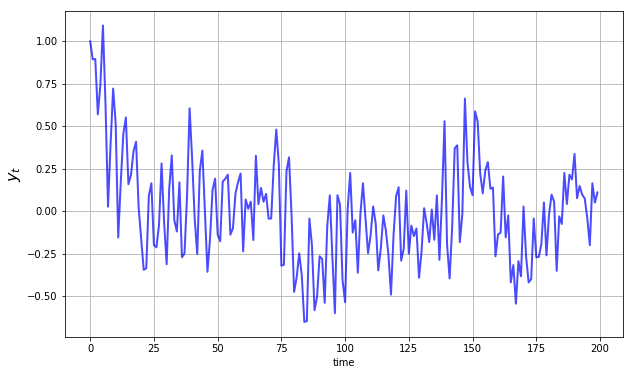

In [6]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.2

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))
x, y = ar.simulate(ts_length=200)

fig, ax = plt.subplots(figsize=(10, 6))
y = y.flatten()
ax.plot(y, 'b-', lw=2, alpha=0.7)
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('$y_t$', fontsize=16)
plt.show()

Exercise 3: Replicate the graph
    
![Ex3](img/lssm_5.png)

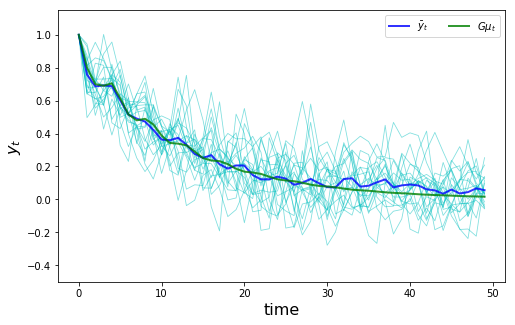

In [7]:
from scipy.stats import norm
import random

ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

I = 20
T = 50
ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))
ymin, ymax = -0.5, 1.15

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_ylim(ymin, ymax)
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('$y_t$', fontsize=16)

ensemble_mean = np.zeros(T)
for i in range(I):
    x, y = ar.simulate(ts_length=T)
    y = y.flatten()
    ax.plot(y, 'c-', lw=0.8, alpha=0.5)
    ensemble_mean = ensemble_mean + y

ensemble_mean = ensemble_mean / I
ax.plot(ensemble_mean, color='b', lw=2, alpha=0.8, label='$\\bar y_t$')

m = ar.moment_sequence()
population_means = []
for t in range(T):
    μ_x, μ_y, Σ_x, Σ_y = next(m)
    population_means.append(float(μ_y))
ax.plot(population_means, color='g', lw=2, alpha=0.8, label='$G\mu_t$')
ax.legend(ncol=2)
plt.show()

Exercise 4: Replicate the graph
    
![Ex3](img/lssm_6.png)

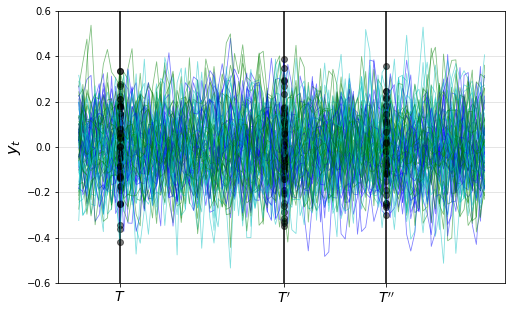

In [8]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

T0 = 10
T1 = 50
T2 = 75
T4 = 100

ar = LinearStateSpace(A, C, G, mu_0=np.ones(4), Sigma_0=Σ_x)
ymin, ymax = -0.6, 0.6

fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(alpha=0.4)
ax.set_ylim(ymin, ymax)
ax.set_ylabel('$y_t$', fontsize=16)
ax.vlines((T0, T1, T2), -1.5, 1.5)

ax.set_xticks((T0, T1, T2))
ax.set_xticklabels(("$T$", "$T'$", "$T''$"), fontsize=14)

μ_x, μ_y, Σ_x, Σ_y = ar.stationary_distributions()
ar.mu_0 = μ_x
ar.Sigma_0 = Σ_x

for i in range(80):
    rcolor = random.choice(('c', 'g', 'b'))
    x, y = ar.simulate(ts_length=T4)
    y = y.flatten()
    ax.plot(y, color=rcolor, lw=0.8, alpha=0.5)
    ax.plot((T0, T1, T2), (y[T0], y[T1], y[T2],), 'ko', alpha=0.5)
plt.show()

#### Lesson: Finite Markov Chains

In [1]:
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import MarkovChain
import re
from operator import itemgetter

In [2]:
ψ = (0.1, 0.9)           # Probabilities over sample space {0, 1}
cdf = np.cumsum(ψ)
qe.random.draw(cdf, 5)   # Generate 5 independent draws from ψ

array([1, 1, 1, 1, 1])

In [3]:
def mc_sample_path(P, init=0, sample_size=1000):
    # Make sure P is a NumPy array
    P = np.asarray(P)
    # Allocate memory
    X = np.empty(sample_size, dtype=int)
    X[0] = init
    # Convert each row of P into a distribution
    # In particular, P_dist[i] = the distribution corresponding to P[i, :]
    n = len(P)
    P_dist = [np.cumsum(P[i, :]) for i in range(n)]

    # Generate the sample path
    for t in range(sample_size - 1):
        X[t+1] = qe.random.draw(P_dist[X[t]])

    return X

The fraction of sample taking value 0 shouls be around 0.25:

In [4]:
P = [[0.4, 0.6], [0.2, 0.8]]
X = mc_sample_path(P, sample_size=100000)
np.mean(X == 0)

0.2497

Same with QuantEcon lib:

In [5]:
P = [[0.4, 0.6], [0.2, 0.8]]
mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1000000)
np.mean(X == 0)

0.250336

Difference between a regular fuction and JIT one:

In [6]:
%timeit mc_sample_path(P, sample_size=1000000) # Our version

1.63 s ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit mc.simulate(ts_length=1000000) # qe version

68.2 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
mc = qe.MarkovChain(P, state_values=('unemployed', 'employed'))
mc.simulate(ts_length=4, init='employed')

array(['employed', 'employed', 'employed', 'unemployed'], dtype='<U10')

In [9]:
mc.simulate_indices(ts_length=4)

array([0, 1, 1, 1])

Checking if a stochastic matrix is irreducible:

In [10]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

Also finding the communication classes:

In [11]:
mc.communication_classes

[array(['poor', 'middle', 'rich'], dtype='<U6')]

Check for periodicaliy:

In [13]:
P = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]

mc = qe.MarkovChain(P)
mc.period

3

In [14]:
P = [[0.0, 1.0, 0.0, 0.0],
     [0.5, 0.0, 0.5, 0.0],
     [0.0, 0.5, 0.0, 0.5],
     [0.0, 0.0, 1.0, 0.0]]

mc = qe.MarkovChain(P)
mc.period

2

In [15]:
mc.is_aperiodic

False

Searching for stationary distributions:

In [16]:
P = [[0.4, 0.6], [0.2, 0.8]]
mc = qe.MarkovChain(P)
mc.stationary_distributions  # Show all stationary distributions

array([[0.25, 0.75]])

Exercise 1
    
![Ex1](img/fmc_1.png)

![Ex1](img/fmc_2.png)

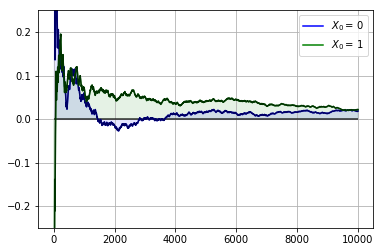

In [24]:
N = 10000
a = b = 0.1

P = np.array([[1-a, a],[b, 1-b]])

mc = qe.MarkovChain(P)

fig, ax = plt.subplots()
#Decoration part:
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, N, lw=2, alpha=0.6)   

cols = ('blue', 'green')
for X_0 in (0,1):
    X = mc.simulate(N, init=X_0)
    X_bar = (X == 0).cumsum() / (1 + np.arange(N, dtype=float))
    ax.fill_between(range(N), np.zeros(N), X_bar - p, color=cols[X_0], alpha=0.1)
    ax.plot(X_bar - p, color=cols[X_0], label=f'$X_0 = \, {X_0} $')
    ax.plot(X_bar - p, 'k-', alpha=0.6)

ax.legend(loc='upper right')
plt.show()

Exercise 2 - page ranking using Markov Chains:

![Ex2](img/fmc_3.png)

In [27]:
file = 'web_graph_data.txt'
alphabet = 'abcdefghijklmnopqrstuvwxyz'

n = 14

# Matrix with indicators of links:
Q = np.zeros((n, n), dtype=int)
f = open(file, 'r')
links = f.readlines()
f.close()

for link in links:
    page1, page2 = re.findall('\w', link)
    i, j = alphabet.index(page1), alphabet.index(page2)
    Q[i, j] = 1
    
# Now Markov matrix
P = np.empty((n, n))
for i in range(n):
    P[i, :] = Q[i, :] / Q[i, :].sum()
mc = qe.MarkovChain(P)


r = mc.stationary_distributions[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}

# Solutions, sorted from highest to lowest rank
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print(f'{name}: {rank:.4}')


g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.09106
b: 0.08326
e: 0.05312
i: 0.05312
c: 0.04834
h: 0.0456
l: 0.03202
d: 0.03056
f: 0.01164
a: 0.002911


#### Lesson: Continuous State Markov Chains

Exercise 1
    
![Ex1](img/csmc_1.png)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import lognorm, beta
from quantecon import LAE
from scipy.stats import norm, gaussian_kde

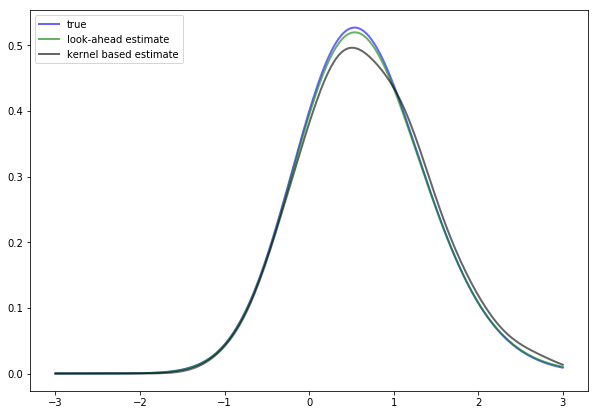

In [36]:
n = 500
theta = 0.8
f = norm()

thau = lambda y : 2 * norm.pdf(y) * norm.cdf((theta * y)/(1-theta ** 2) ** (1/2))    
ker = lambda x_t,  x_t1 : f.pdf((x_t1 - theta * np.abs(x_t)) / (1 - theta **2) ** (1/2)) / d

Z = ϕ.rvs(n)
X = np.empty(n)
for t in range(n-1):
    X[t+1] = θ * np.abs(X[t]) + np.sqrt(1 - θ**2) * Z[t]
thau_estimated = LAE(ker, X)
k_estimated = gaussian_kde(X)

fig, ax = plt.subplots(figsize=(10, 7))
ys = np.linspace(-3, 3, 200)
ax.plot(ys, thau(ys), 'b-', lw=2, alpha=0.6, label='true')
ax.plot(ys, thau_estimated(ys), 'g-', lw=2, alpha=0.6, label='look-ahead estimate')
ax.plot(ys, k_estimated(ys), 'k-', lw=2, alpha=0.6, label='kernel based estimate')
ax.legend(loc='upper left')
plt.show()

Exercise 2
    
![Ex2](img/csmc_2.png)

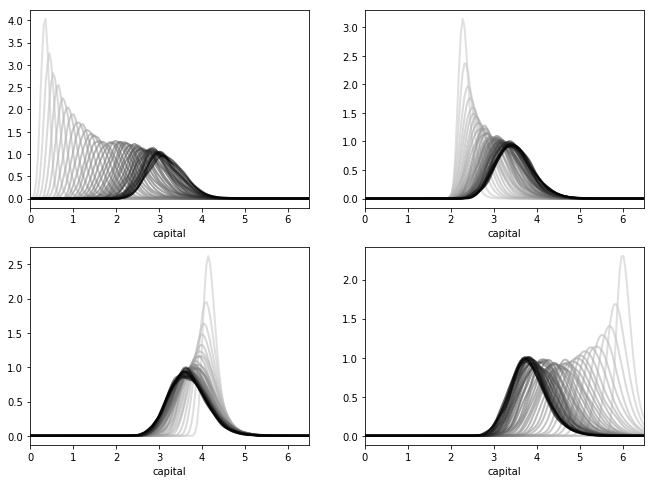

In [38]:
# Solution left unchanged

s = 0.2
δ = 0.1
a_σ = 0.4                                # A = exp(B) where B ~ N(0, a_σ)
α = 0.4                                  # f(k) = k**α

ϕ = lognorm(a_σ)

def p(x, y):
    "Stochastic kernel, vectorized in x.  Both x and y must be positive."
    d = s * x**α
    return ϕ.pdf((y - (1 - δ) * x) / d) / d

n = 1000                            # Number of observations at each date t
T = 40                              # Compute density of k_t at 1,...,T

fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()
xmax = 6.5

for i in range(4):
    ax = axes[i]
    ax.set_xlim(0, xmax)
    ψ_0 = beta(5, 5, scale=0.5, loc=i*2)  # Initial distribution

    # == Generate matrix s.t. t-th column is n observations of k_t == #
    k = np.empty((n, T))
    A = ϕ.rvs((n, T))
    k[:, 0] = ψ_0.rvs(n)
    for t in range(T-1):
        k[:, t+1] = s * A[:,t] * k[:, t]**α + (1 - δ) * k[:, t]

    # == Generate T instances of lae using this data, one for each t == #
    laes = [LAE(p, k[:, t]) for t in range(T)]

    ygrid = np.linspace(0.01, xmax, 150)
    greys = [str(g) for g in np.linspace(0.0, 0.8, T)]
    greys.reverse()
    for ψ, g in zip(laes, greys):
        ax.plot(ygrid, ψ(ygrid), color=g, lw=2, alpha=0.6)
    ax.set_xlabel('capital')
plt.show()

Exercise 3
    
![Ex2](img/csmc_3.png)

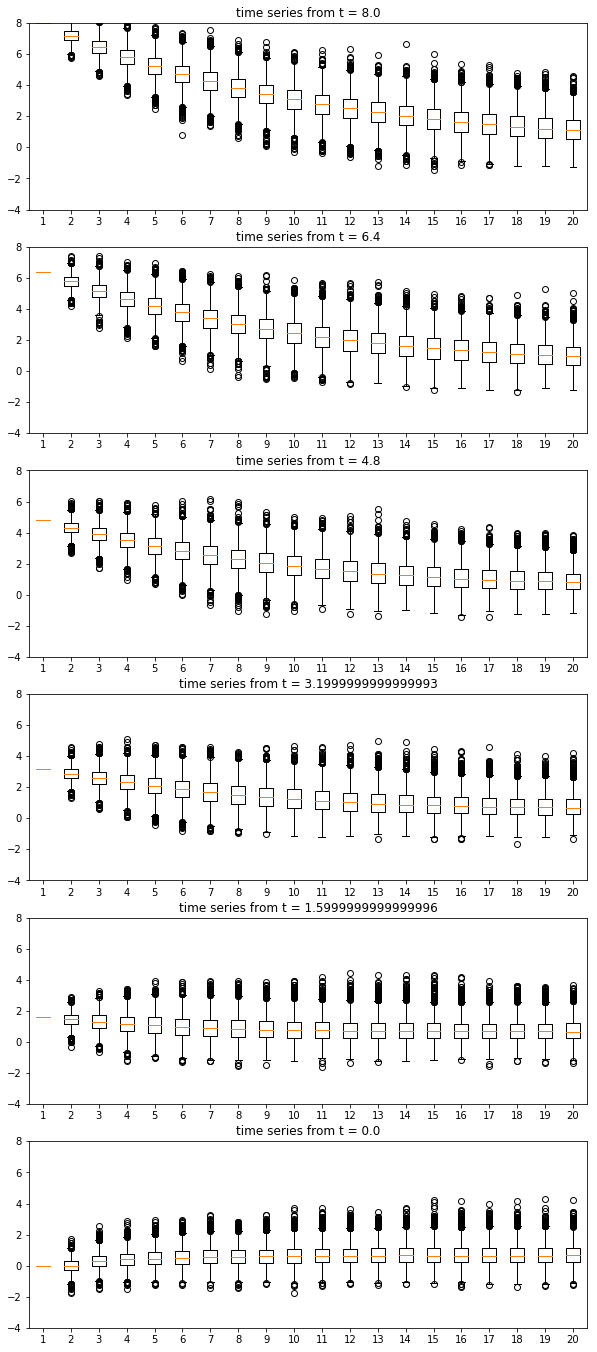

In [40]:
n = 20
k = 5000
J = 6

θ = 0.9
d = np.sqrt(1 - θ**2)
δ = θ / d

fig, axes = plt.subplots(J, 1, figsize=(10, 4*J))
initial_conditions = np.linspace(8, 0, J)
X = np.empty((k, n))

for j in range(J):

    axes[j].set_ylim(-4, 8)
    axes[j].set_title(f'time series from t = {initial_conditions[j]}')

    Z = np.random.randn(k, n)
    X[:, 0] = initial_conditions[j]
    for t in range(1, n):
        X[:, t] = θ * np.abs(X[:, t-1]) + d * Z[:, t]
    axes[j].boxplot(X)

plt.show()

#### Lesson: Cass-Koopmans Optimal Growth Model

In [41]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
@njit
def u(c, γ):
    '''
    Utility function
    ASIDE: If you have a utility function that is hard to solve by hand
    you can use automatic or symbolic  differentiation
    See https://github.com/HIPS/autograd
    '''
    if γ == 1:
        # If γ = 1 we can show via L'hopital's Rule that the utility
        # becomes log
        return np.log(c)
    else:
        return c**(1 - γ) / (1 - γ)

@njit
def u_prime(c, γ):
    '''Derivative of utility'''
    if γ == 1:
        return 1 / c
    else:
        return c**(-γ)

@njit
def u_prime_inv(c, γ):
    '''Inverse utility'''
    if γ == 1:
        return c
    else:
        return c**(-1 / γ)

@njit
def f(A, k, α):
    '''Production function'''
    return A * k**α

@njit
def f_prime(A, k, α):
    '''Derivative of production function'''
    return α * A * k**(α - 1)

@njit
def f_prime_inv(A, k, α):
    return (k / (A * α))**(1 / (α - 1))

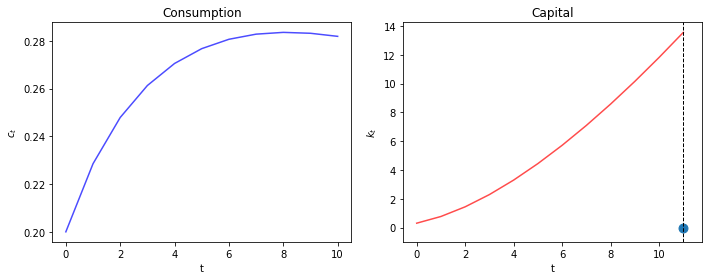

In [43]:
# Parameters
γ = 2
δ = 0.02
β = 0.95
α = 0.33
A = 1

# Initial guesses
T = 10
c = np.zeros(T+1)  # T periods of consumption initialized to 0
# T periods of capital initialized to 0 (T+2 to include t+1 variable as well)
k = np.zeros(T+2)
k[0] = 0.3  # Initial k
c[0] = 0.2  # Guess of c_0

@njit
def shooting_method(c, # Initial consumption
                    k,   # Initial capital
                    γ,   # Coefficient of relative risk aversion
                    δ,   # Depreciation rate on capital# Depreciation rate
                    β,   # Discount factor
                    α,   # Return to capital per capita
                    A):  # Technology

    T = len(c) - 1

    for t in range(T):
        # Equation 1 with inequality
        k[t+1] = f(A=A, k=k[t], α=α) + (1 - δ) * k[t] - c[t]
        if k[t+1] < 0:   # Ensure nonnegativity
            k[t+1] = 0

      # Equation 2: We keep in the general form to show how we would
      # solve if we didn't want to do any simplification

        if β * (f_prime(A=A, k=k[t+1], α=α) + (1 - δ)) == np.inf:
            # This only occurs if k[t+1] is 0, in which case, we won't
            # produce anything next period, so consumption will have to be 0
            c[t+1] = 0
        else:
            c[t+1] = u_prime_inv(u_prime(c=c[t], γ=γ) \
            / (β * (f_prime(A=A, k=k[t+1], α=α) + (1 - δ))), γ=γ)

    # Terminal condition calculation
    k[T+1] = f(A=A, k=k[T], α=α) + (1 - δ) * k[T] - c[T]

    return c, k

paths = shooting_method(c, k, γ, δ, β, α, A)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

for path, color, title, y, ax in zip(paths, colors, titles, ylabels, axes):
    ax.plot(path, c=color, alpha=0.7)
    ax.set(title=title, ylabel=y, xlabel='t')

ax.scatter(T+1, 0, s=80)
ax.axvline(T+1, color='k', ls='--', lw=1)

plt.tight_layout()
plt.show()

In [44]:
@njit
def bisection_method(c,
                     k,
                     γ,              # Coefficient of relative risk aversion
                     δ,              # Depreciation rate
                     β,              # Discount factor
                     α,              # Return to capital per capita
                     A,              # Technology
                     tol=1e-4,
                     max_iter=1e4,
                     terminal=0):    # Value we are shooting towards

    T = len(c) - 1
    i = 1                            # Initial iteration
    c_high = f(k=k[0], α=α, A=A)     # Initial high value of c
    c_low = 0                        # Initial low value of c

    path_c, path_k = shooting_method(c, k, γ, δ, β, α, A)

    while (np.abs((path_k[T+1] - terminal)) > tol or path_k[T] == terminal) \
        and i < max_iter:

        if path_k[T+1] - terminal > tol:
            # If assets are too high the c[0] we chose is now a lower bound
            # on possible values of c[0]
            c_low = c[0]
        elif path_k[T+1] - terminal < -tol:
            # If assets fell too quickly, the c[0] we chose is now an upper
            # bound on possible values of c[0]
            c_high=c[0]
        elif path_k[T] == terminal:
            # If assets fell  too quickly, the c[0] we chose is now an upper
            # bound on possible values of c[0]
            c_high=c[0]

        c[0] = (c_high + c_low) / 2  # This is the bisection part
        path_c, path_k = shooting_method(c, k, γ, δ, β, α, A)
        i += 1

    if np.abs(path_k[T+1] - terminal) < tol and path_k[T] != terminal:
        print('Converged successfully on iteration', i-1)
    else:
        print('Failed to converge and hit maximum iteration')

    μ = u_prime(c=path_c, γ=γ)
    return path_c, path_k, μ

Converged successfully on iteration 18


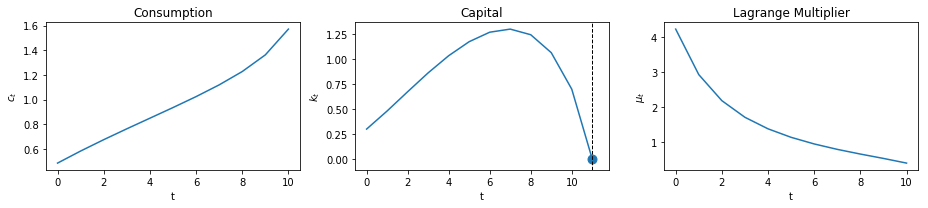

In [45]:
T = 10
c = np.zeros(T+1) # T periods of consumption initialized to 0
# T periods of capital initialized to 0. T+2 to include t+1 variable as well
k = np.zeros(T+2)

k[0] = 0.3 # initial k
c[0] = 0.3 # our guess of c_0

paths = bisection_method(c, k, γ, δ, β, α, A)

def plot_paths(paths, axes=None, ss=None):

    T = len(paths[0])

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    for path, y, title, ax in zip(paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    # Plot steady state value of capital
    if ss is not None:
        axes[1].axhline(ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, paths[1][-1], s=80)
    plt.tight_layout()

plot_paths(paths)

In [46]:
ρ = 1 / β - 1
k_ss = f_prime_inv(k=ρ+δ, A=A, α=α)

print(f'steady state for capital is: {k_ss}')

steady state for capital is: 9.57583816331462


Converged successfully on iteration 39


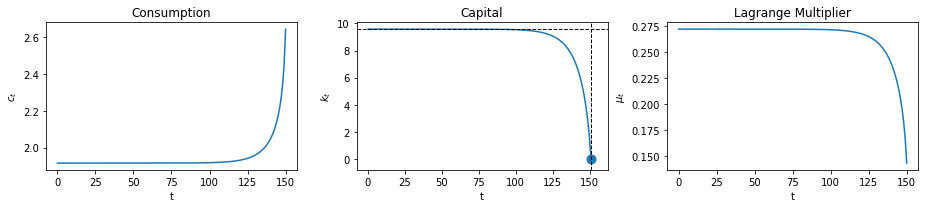

In [47]:
T = 150
c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_ss  # Start at steady state
paths = bisection_method(c, k, γ, δ, β, α, A)

plot_paths(paths, ss=k_ss)

Converged successfully on iteration 39


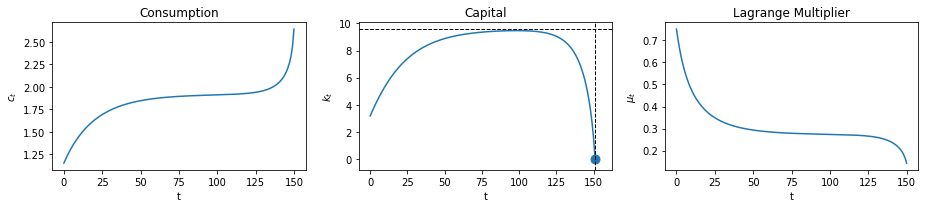

In [48]:
k_init = k_ss / 3   # Below our steady state
T = 150
c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_init
paths = bisection_method(c, k, γ, δ, β, α, A)

plot_paths(paths, ss=k_ss)

Converged successfully on iteration 39
Converged successfully on iteration 26
Converged successfully on iteration 25
Converged successfully on iteration 22


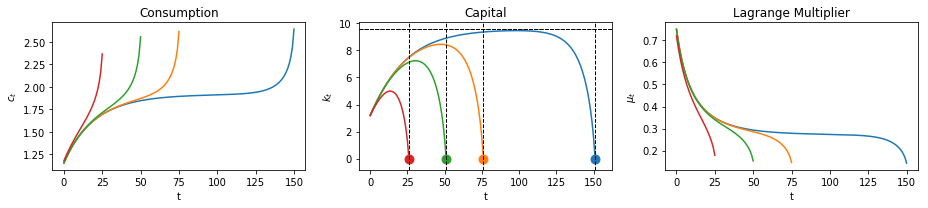

In [49]:
T_list = (150, 75, 50, 25)

fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_init
    paths = bisection_method(c, k, γ, δ, β, α, A)
    plot_paths(paths, ss=k_ss, axes=axes)

Failed to converge and hit maximum iteration
Converged successfully on iteration 39
Converged successfully on iteration 25
Converged successfully on iteration 22


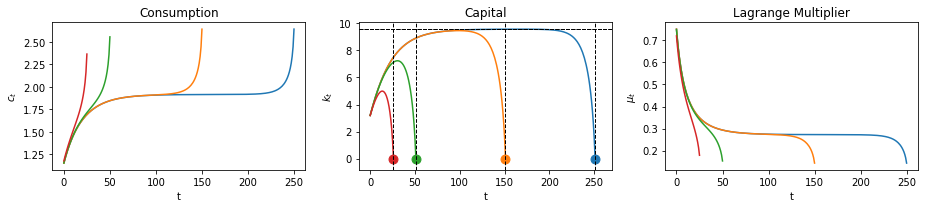

In [50]:
T_list = (250, 150, 50, 25)

fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_init
    paths = bisection_method(c, k, γ, δ, β, α, A)
    plot_paths(paths, ss=k_ss, axes=axes)

Failed to converge and hit maximum iteration
Converged successfully on iteration 39
Converged successfully on iteration 26
Converged successfully on iteration 25


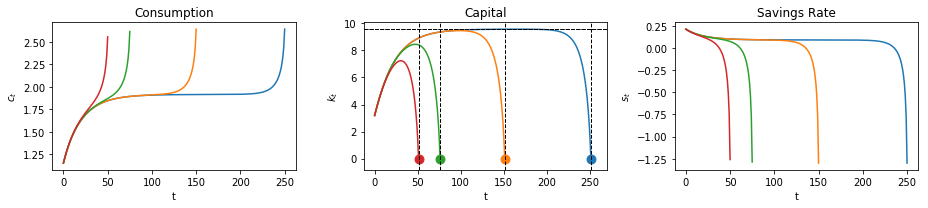

In [51]:
@njit
def S(K):
    '''Aggregate savings'''
    T = len(K) - 2
    S = np.zeros(T+1)
    for t in range(T+1):
        S[t] = K[t+1] - (1 - δ) * K[t]
    return S

@njit
def s(K):
    '''Savings rate'''
    T = len(K) - 2
    Y = f(A, K, α)
    Y = Y[0:T+1]
    s = S(K) / Y
    return s

def plot_savings(paths, c_ss=None, k_ss=None, s_ss=None, axes=None):

    T = len(paths[0])
    k_star = paths[1]
    savings_path = s(k_star)
    new_paths = (paths[0], paths[1], savings_path)

    if axes is None:
        fix, axes = plt.subplots(1, 3, figsize=(13, 3))

    ylabels = ['$c_t$', '$k_t$', '$s_t$']
    titles = ['Consumption', 'Capital', 'Savings Rate']

    for path, y, title, ax in zip(new_paths, ylabels, titles, axes):
        ax.plot(path)
        ax.set(ylabel=y, title=title, xlabel='t')

    # Plot steady state value of consumption
    if c_ss is not None:
        axes[0].axhline(c_ss, c='k', ls='--', lw=1)

    # Plot steady state value of capital
    if k_ss is not None:
        axes[1].axhline(k_ss, c='k', ls='--', lw=1)

    # Plot steady state value of savings
    if s_ss is not None:
        axes[2].axhline(s_ss, c='k', ls='--', lw=1)

    axes[1].axvline(T, c='k', ls='--', lw=1)
    axes[1].scatter(T, k_star[-1], s=80)
    plt.tight_layout()

T_list = (250, 150, 75, 50)

fix, axes = plt.subplots(1, 3, figsize=(13, 3))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_init
    paths = bisection_method(c, k, γ, δ, β, α, A)
    plot_savings(paths, k_ss=k_ss, axes=axes)

Converged successfully on iteration 35


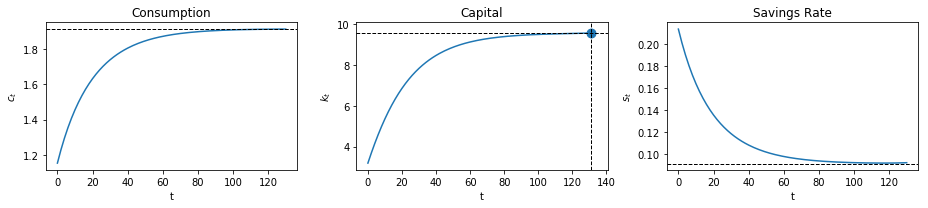

In [52]:
T = 130

# Steady states
S_ss = δ * k_ss
c_ss = f(A, k_ss, α) - S_ss
s_ss = S_ss / f(A, k_ss, α)

c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_ss / 3         # Start below steady state
paths = bisection_method(c, k, γ, δ, β, α, A, terminal=k_ss)
plot_savings(paths, k_ss=k_ss, s_ss=s_ss, c_ss=c_ss)

Converged successfully on iteration 31


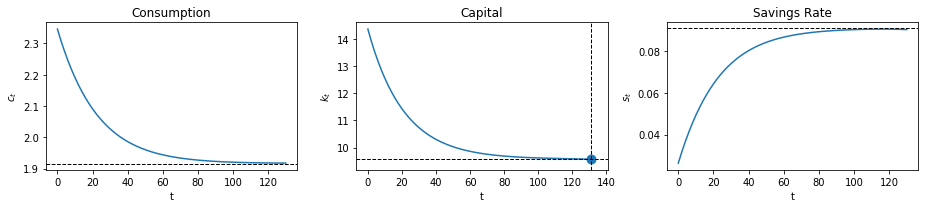

In [53]:
T = 130

c = np.zeros(T+1)
k = np.zeros(T+2)
c[0] = 0.3
k[0] = k_ss * 1.5   # Start above steady state
paths = bisection_method(c, k, γ, δ, β, α, A, terminal=k_ss)
plot_savings(paths, k_ss=k_ss, s_ss=s_ss, c_ss=c_ss)

In [54]:
@njit
def q_func(β, c, γ):
    # Here we choose numeraire to be u'(c_0) -- this is q^(t_0)_t
    T = len(c) - 2
    q = np.zeros(T+1)
    q[0] = 1
    for t in range(1, T+2):
        q[t] = β**t * u_prime(c[t], γ)
    return q

@njit
def w_func(A, k, α):
    w = f(A, k, α) - k * f_prime(A, k, α)
    return w

@njit
def η_func(A, k, α):
    η = f_prime(A, k, α)
    return η

Failed to converge and hit maximum iteration
Converged successfully on iteration 39
Converged successfully on iteration 26
Converged successfully on iteration 25


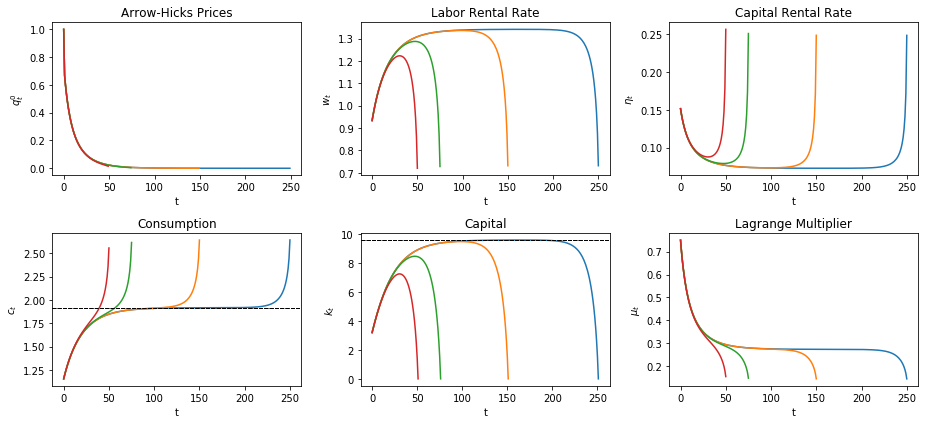

In [55]:
T_list = (250, 150, 75, 50)

fix, axes = plt.subplots(2, 3, figsize=(13, 6))
titles = ['Arrow-Hicks Prices', 'Labor Rental Rate', 'Capital Rental Rate',
          'Consumption', 'Capital', 'Lagrange Multiplier']
ylabels = ['$q_t^0$', '$w_t$', '$\eta_t$', '$c_t$', '$k_t$', '$\mu_t$']

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_ss / 3
    c, k, μ = bisection_method(c, k, γ, δ, β, α, A)

    q = q_func(β, c, γ)
    w = w_func(β, k, α)[:-1]
    η = η_func(A, k, α)[:-1]
    plots = [q, w, η, c, k, μ]

    for ax, plot, title, y in zip(axes.flatten(), plots, titles, ylabels):
        ax.plot(plot)
        ax.set(title=title, ylabel=y, xlabel='t')
        if title is 'Capital':
            ax.axhline(k_ss, lw=1, ls='--', c='k')
        if title is 'Consumption':
            ax.axhline(c_ss, lw=1, ls='--', c='k')


plt.tight_layout()
plt.show()

Converged successfully on iteration 44
Converged successfully on iteration 37
Converged successfully on iteration 37
Converged successfully on iteration 37


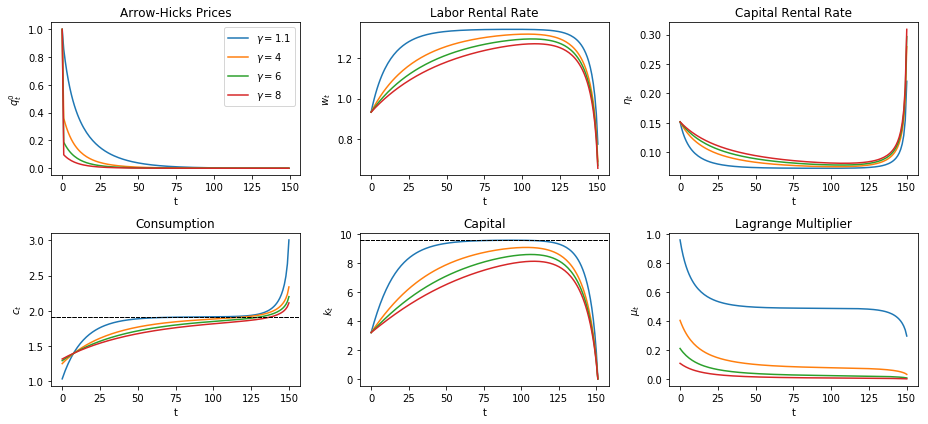

In [56]:
γ_list = (1.1, 4, 6, 8)
T = 150

fix, axes = plt.subplots(2, 3, figsize=(13, 6))

for γ in γ_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_ss / 3
    c, k, μ = bisection_method(c, k, γ, δ, β, α, A)

    q = q_func(β, c, γ)
    w = w_func(β, k, α)[:-1]
    η = η_func(A, k, α)[:-1]
    plots = [q, w, η, c, k, μ]

    for ax, plot, title, y in zip(axes.flatten(), plots, titles, ylabels):
        ax.plot(plot, label=f'$\gamma = {γ}$')
        ax.set(title=title, ylabel=y, xlabel='t')
        if title is 'Capital':
            ax.axhline(k_ss, lw=1, ls='--', c='k')
        if title is 'Consumption':
            ax.axhline(c_ss, lw=1, ls='--', c='k')

axes[0, 0].legend()
plt.tight_layout()
plt.show()

Converged successfully on iteration 39
Converged successfully on iteration 26
Converged successfully on iteration 25


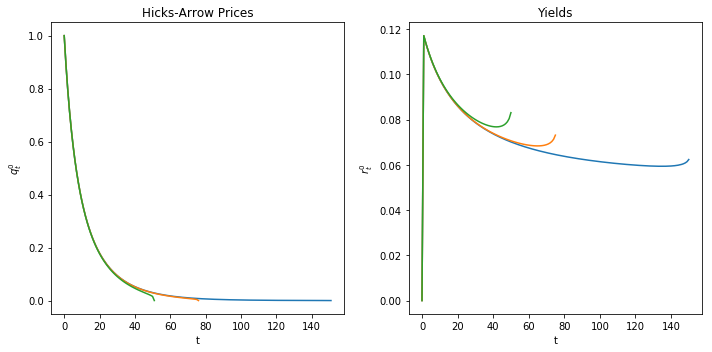

In [57]:
@njit
def q_func(t_0, β, c, γ):
    # Here we choose numeraire to be u'(c_0) -- this is q^(t_0)_t
    T = len(c)
    q = np.zeros(T+1-t_0)
    q[0] = 1
    for t in range(t_0+1, T):
        q[t-t_0] = β**(t - t_0) * u_prime(c[t], γ) / u_prime(c[t_0], γ)
    return q

@njit
def r_func(t_0, β, c, γ):
    '''Yield to maturity'''
    T = len(c) - 1
    r = np.zeros(T+1-t_0)
    for t in range(t_0+1, T+1):
        r[t-t_0]= -np.log(q_func(t_0, β, c, γ)[t-t_0]) / (t - t_0)
    return r

t_0 = 0
T_list = [150, 75, 50]
γ = 2
titles = ['Hicks-Arrow Prices', 'Yields']
ylabels = ['$q_t^0$', '$r_t^0$']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_ss / 3
    c, k, μ = bisection_method(c, k, γ, δ, β, α, A)
    q = q_func(t_0, β, c, γ)
    r = r_func(t_0, β, c, γ)

    for ax, plot, title, y in zip(axes, (q, r), titles, ylabels):
        ax.plot(plot)
        ax.set(title=title, ylabel=y, xlabel='t')

plt.tight_layout()
plt.show()

Converged successfully on iteration 39
Converged successfully on iteration 26
Converged successfully on iteration 25


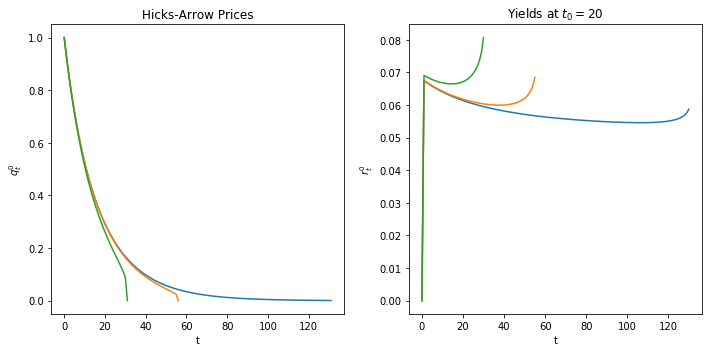

In [58]:
t_0 = 20

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for T in T_list:
    c = np.zeros(T+1)
    k = np.zeros(T+2)
    c[0] = 0.3
    k[0] = k_ss / 3
    c, k, μ = bisection_method(c, k, γ, δ, β, α, A)
    q = q_func(t_0, β, c, γ)
    r = r_func(t_0, β, c, γ)

    for ax, plot, title, y in zip(axes, (q, r), titles, ylabels):
        ax.plot(plot)
        ax.set(title=title, ylabel=y, xlabel='t')

axes[1].set_title(f'Yields at $t_0 = {t_0}$')
plt.tight_layout()
plt.show()

#### Lesson: A First Look at the Kalman Filter

In [59]:
from scipy import linalg
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import Kalman, LinearStateSpace
from scipy.stats import norm
from scipy.integrate import quad
from numpy.random import multivariate_normal
from scipy.linalg import eigvals

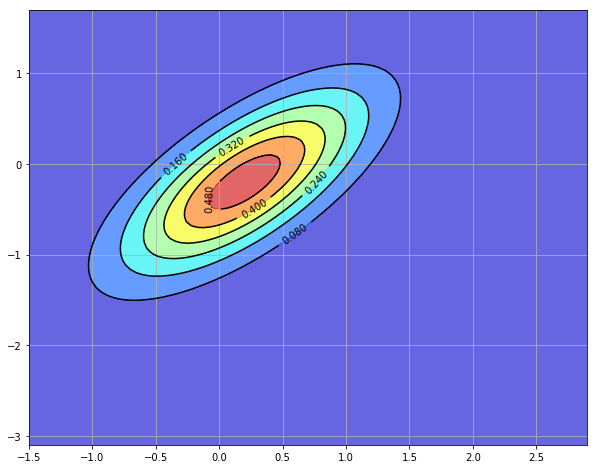

In [60]:
# Set up the Gaussian prior density p
Σ = [[0.4, 0.3], [0.3, 0.45]]
Σ = np.matrix(Σ)
x_hat = np.matrix([0.2, -0.2]).T
# Define the matrices G and R from the equation y = G x + N(0, R)
G = [[1, 0], [0, 1]]
G = np.matrix(G)
R = 0.5 * Σ
# The matrices A and Q
A = [[1.2, 0], [0, -0.2]]
A = np.matrix(A)
Q = 0.3 * Σ
# The observed value of y
y = np.matrix([2.3, -1.9]).T

# Set up grid for plotting
x_grid = np.linspace(-1.5, 2.9, 100)
y_grid = np.linspace(-3.1, 1.7, 100)
X, Y = np.meshgrid(x_grid, y_grid)

def bivariate_normal(x, y, σ_x=1.0, σ_y=1.0, μ_x=0.0, μ_y=0.0, σ_xy=0.0):
    """
    Compute and return the probability density function of bivariate normal
    distribution of normal random variables x and y

    Parameters
    ----------
    x : array_like(float)
        Random variable

    y : array_like(float)
        Random variable

    σ_x : array_like(float)
          Standard deviation of random variable x

    σ_y : array_like(float)
          Standard deviation of random variable y

    μ_x : scalar(float)
          Mean value of random variable x

    μ_y : scalar(float)
          Mean value of random variable y

    σ_xy : array_like(float)
           Covariance of random variables x and y

    """

    x_μ = x - μ_x
    y_μ = y - μ_y

    ρ = σ_xy / (σ_x * σ_y)
    z = x_μ**2 / σ_x**2 + y_μ**2 / σ_y**2 - 2 * ρ * x_μ * y_μ / (σ_x * σ_y)
    denom = 2 * np.pi * σ_x * σ_y * np.sqrt(1 - ρ**2)
    return np.exp(-z / (2 * (1 - ρ**2))) / denom

def gen_gaussian_plot_vals(μ, C):
    "Z values for plotting the bivariate Gaussian N(μ, C)"
    m_x, m_y = float(μ[0]), float(μ[1])
    s_x, s_y = np.sqrt(C[0, 0]), np.sqrt(C[1, 1])
    s_xy = C[0, 1]
    return bivariate_normal(X, Y, s_x, s_y, m_x, m_y, s_xy)

# Plot the figure

fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

Z = gen_gaussian_plot_vals(x_hat, Σ)
ax.contourf(X, Y, Z, 6, alpha=0.6, cmap=cm.jet)
cs = ax.contour(X, Y, Z, 6, colors="black")
ax.clabel(cs, inline=1, fontsize=10)

plt.show()

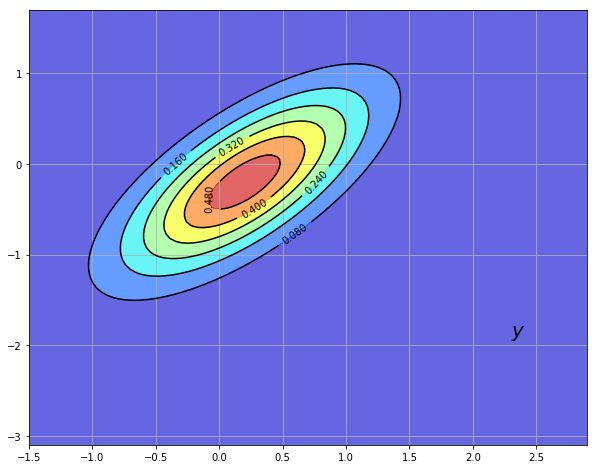

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

Z = gen_gaussian_plot_vals(x_hat, Σ)
ax.contourf(X, Y, Z, 6, alpha=0.6, cmap=cm.jet)
cs = ax.contour(X, Y, Z, 6, colors="black")
ax.clabel(cs, inline=1, fontsize=10)
ax.text(float(y[0]), float(y[1]), "$y$", fontsize=20, color="black")

plt.show()

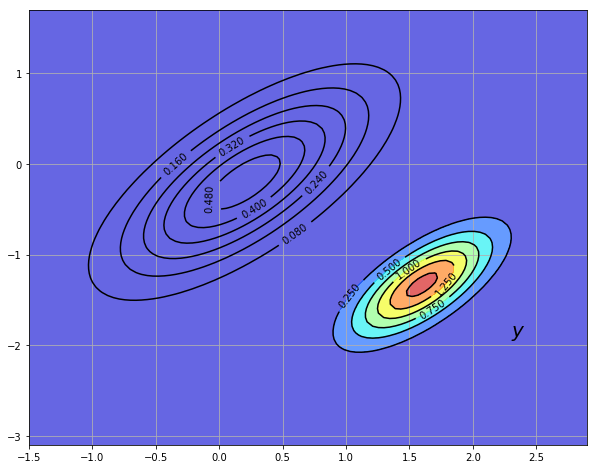

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

Z = gen_gaussian_plot_vals(x_hat, Σ)
cs1 = ax.contour(X, Y, Z, 6, colors="black")
ax.clabel(cs1, inline=1, fontsize=10)
M = Σ * G.T * linalg.inv(G * Σ * G.T + R)
x_hat_F = x_hat + M * (y - G * x_hat)
Σ_F = Σ - M * G * Σ
new_Z = gen_gaussian_plot_vals(x_hat_F, Σ_F)
cs2 = ax.contour(X, Y, new_Z, 6, colors="black")
ax.clabel(cs2, inline=1, fontsize=10)
ax.contourf(X, Y, new_Z, 6, alpha=0.6, cmap=cm.jet)
ax.text(float(y[0]), float(y[1]), "$y$", fontsize=20, color="black")

plt.show()



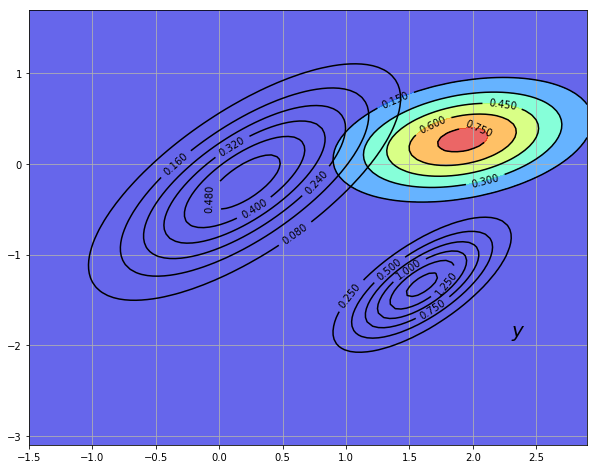

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.grid()

# Density 1
Z = gen_gaussian_plot_vals(x_hat, Σ)
cs1 = ax.contour(X, Y, Z, 6, colors="black")
ax.clabel(cs1, inline=1, fontsize=10)

# Density 2
M = Σ * G.T * linalg.inv(G * Σ * G.T + R)
x_hat_F = x_hat + M * (y - G * x_hat)
Σ_F = Σ - M * G * Σ
Z_F = gen_gaussian_plot_vals(x_hat_F, Σ_F)
cs2 = ax.contour(X, Y, Z_F, 6, colors="black")
ax.clabel(cs2, inline=1, fontsize=10)

# Density 3
new_x_hat = A * x_hat_F
new_Σ = A * Σ_F * A.T + Q
new_Z = gen_gaussian_plot_vals(new_x_hat, new_Σ)
cs3 = ax.contour(X, Y, new_Z, 6, colors="black")
ax.clabel(cs3, inline=1, fontsize=10)
ax.contourf(X, Y, new_Z, 6, alpha=0.6, cmap=cm.jet)
ax.text(float(y[0]), float(y[1]), "$y$", fontsize=20, color="black")

plt.show()

#### Lesson: Reverse Engineering a la Muth

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.linalg as la

from quantecon import Kalman
from quantecon import LinearStateSpace
from scipy.stats import norm
np.set_printoptions(linewidth=120, precision=4, suppress=True)

In [2]:
# Make some parameter choices
# sigx/sigy are state noise std err and measurement noise std err
μ_0, σ_x, σ_y = 10, 1, 5

# Create a LinearStateSpace object
A, C, G, H = 1, σ_x, 1, σ_y
ss = LinearStateSpace(A, C, G, H, mu_0=μ_0)

# Set prior and initialize the Kalman type
x_hat_0, Σ_0 = 10, 1
kmuth = Kalman(ss, x_hat_0, Σ_0)

# Computes stationary values which we need for the innovation
# representation
S1, K1 = kmuth.stationary_values()

# Form innovation representation state-space
Ak, Ck, Gk, Hk = A, K1, G, 1

ssk = LinearStateSpace(Ak, Ck, Gk, Hk, mu_0=x_hat_0)

In [3]:
# Create grand state-space for y_t, a_t as observed vars -- Use
# stacking trick above
Af = np.array([[ 1,      0,        0],
               [K1, 1 - K1, K1 * σ_y],
               [ 0,      0,        0]])
Cf = np.array([[σ_x,        0],
               [  0, K1 * σ_y],
               [  0,        1]])
Gf = np.array([[1,  0, σ_y],
               [1, -1, σ_y]])

μ_true, μ_prior = 10, 10
μ_f = np.array([μ_true, μ_prior, 0]).reshape(3, 1)

# Create the state-space
ssf = LinearStateSpace(Af, Cf, Gf, mu_0=μ_f)

# Draw observations of y from the state-space model
N = 50
xf, yf = ssf.simulate(N)

print(f"Kalman gain = {K1}")
print(f"Conditional variance = {S1}")

Kalman gain = [[0.181]]
Conditional variance = [[5.5249]]


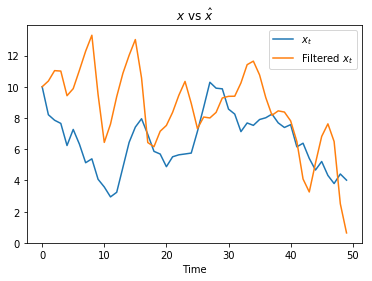

In [4]:
fig, ax = plt.subplots()
ax.plot(xf[0, :], label="$x_t$")
ax.plot(xf[1, :], label="Filtered $x_t$")
ax.legend()
ax.set_xlabel("Time")
ax.set_title(r"$x$ vs $\hat{x}$")
plt.show()

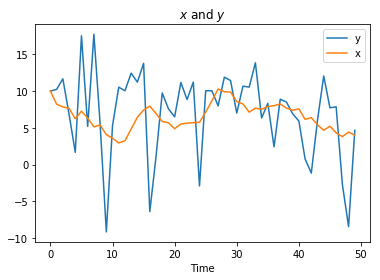

In [5]:
fig, ax = plt.subplots()
ax.plot(yf[0, :], label="y")
ax.plot(xf[0, :], label="x")
ax.legend()
ax.set_title(r"$x$ and $y$")
ax.set_xlabel("Time")
plt.show()

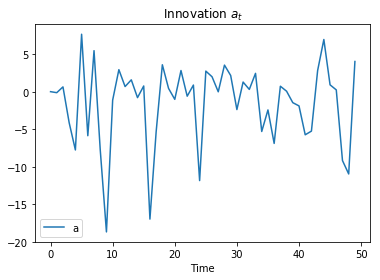

In [6]:
fig, ax = plt.subplots()
ax.plot(yf[1, :], label="a")
ax.legend()
ax.set_title(r"Innovation $a_t$")
ax.set_xlabel("Time")
plt.show()

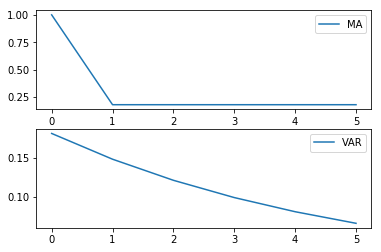

In [7]:
# Kalman Methods for MA and VAR
coefs_ma = kmuth.stationary_coefficients(5, "ma")
coefs_var = kmuth.stationary_coefficients(5, "var")

# Coefficients come in a list of arrays, but we
# want to plot them and so need to stack into an array
coefs_ma_array = np.vstack(coefs_ma)
coefs_var_array = np.vstack(coefs_var)

fig, ax = plt.subplots(2)
ax[0].plot(coefs_ma_array, label="MA")
ax[0].legend()
ax[1].plot(coefs_var_array, label="VAR")
ax[1].legend()

plt.show()

In [8]:
print(f'decay parameter 1 - K1 = {1 - K1}')

decay parameter 1 - K1 = [[0.819]]
